# Part I - (Ford GoBike System Data)
## by (Anas Nimer)

### Introduction

This data set comes from the Ford GoBike bike-sharing system, which operates in the San Francisco Bay Area. The dataset covers trips made in February 2019 and includes information about the start and end times of each trip, the duration of the trip, the start and end locations, and the type of user.


### Dataset Features


| Column Name                 | Description                                      |
|:----------------------------|:------------------------------------------------|
| duration_sec                | Duration of the trip in seconds                 |
| start_time                  | Start time of the trip                          |
| end_time                    | End time of the trip                            |
| start_station_id            | ID of the start station                         |
| start_station_name          | Name of the start station                       |
| start_station_latitude      | Latitude of the start station                   |
| start_station_longitude     | Longitude of the start station                  |
| end_station_id              | ID of the end station                           |
| end_station_name            | Name of the end station                         |
| end_station_latitude        | Latitude of the end station                     |
| end_station_longitude       | Longitude of the end station                    |
| bike_id                     | ID of the bike used                             |
| user_type                   | Type of user (Subscriber/Customer)              |
| member_birth_year           | Birth year of the member                        |
| member_gender               | Gender of the member (Male/Female/Other)        |
| bike_share_for_all_trip     | Whether the bike was shared for the entire trip (Yes/No) |


## Preliminary Wrangling

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Loading The Dataset:

In [8]:
bikes=pd.read_csv('201902-fordgobike-tripdata.csv')

In [9]:
print("The data set has:",bikes.shape[0], "rows", bikes.shape[1],"Columns")

The data set has: 183412 rows 16 Columns


**To view the first 3 rows:**

In [10]:
bikes.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


**To view the data types:**

In [11]:
bikes.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

**To quickly handle the cleaning:**

Function to clean any dataframe:

In [12]:
def clean_bike_data(df):
    """
    Cleans the bike dataset by removing missing values, duplicates, 
    and converting date columns to datetime format.
    
    Parameters:
    df (DataFrame): The raw bike-sharing dataset.
    
    Returns:
    DataFrame: The cleaned dataset.
    """
    # Remove rows with missing values
    df.dropna(inplace=True)
    
    # Remove duplicate rows
    df.drop_duplicates(inplace=True)
    
    # Convert start and end times to datetime
    df['start_time'] = pd.to_datetime(df['start_time'])
    df['end_time'] = pd.to_datetime(df['end_time'])
    
    # Extract start hour for further analysis
    df['start_hour'] = df['start_time'].dt.hour
    
    return df

To clean the data frame:

In [13]:
bikes = clean_bike_data(bikes)

Display the first 3 rows of the cleaned dataset

In [14]:
bikes.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17


### What is the structure of your dataset?

**• Rows:**: 183412 entries  
**• Columns:**: 16 features  


### What is/are the main feature(s) of interest in your dataset?

**1. Trip Duration:** This is a central aspect of the analysis, providing insights into how long trips last and how they vary by user type and time.

**2. User Type:** This feature helps to differentiate between subscribers and customers, revealing how each group uses the service differently.

**3. Start Hour:** This feature allows for exploration of how trip durations vary by the time of day.

**4. Start Station:** This feature shows the distribution of trips across different start stations and their popularity.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**• start_time and end_time:** These are used to calculate trip_duration and start_hour, helping to understand temporal patterns and trip lengths.

**• user_type:** Distinguishes between different types of users, allowing for comparisons in trip duration and behavior.

**• start_station_name:** Shows where trips are initiated, providing insight into station popularity and user preferences.

These features collectively help to explore and understand the relationships between trip duration, user types, time of day, and station popularity, leading to meaningful observations about user behavior and service usage.


### The main questions this analysis aims to address:

**• What are the overall usage patterns in terms of trip durations and times?**

**• How do different user types (subscribers vs. customers) use the bike-sharing service?**

**• Are there specific locations or times of day where bike usage is particularly high?**

## Univariate Exploration

### Question: What is the distribution of trip durations?

To plot the histogram:

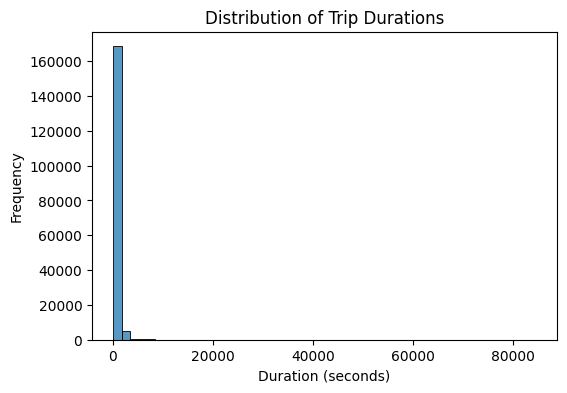

In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(bikes['duration_sec'], bins=50, kde=False)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

**Observation:** Most trips are short, typically lasting a few minutes.

### Question: What are the counts of each user type?

To get the countplot:

/tmp/ipykernel_13/3684943411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bikes, x='user_type', palette='viridis')


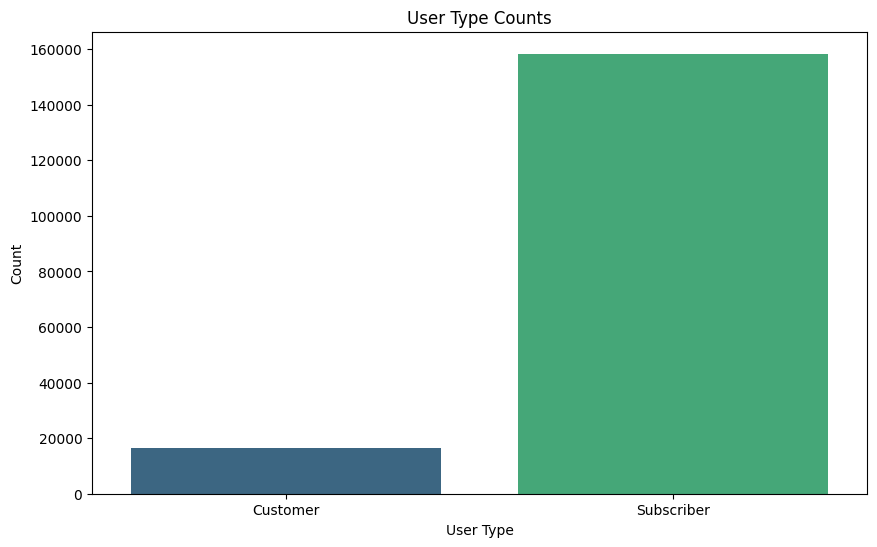

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=bikes, x='user_type', palette='viridis')
plt.title('User Type Counts')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

**Observation:** The majority of users are subscribers rather than Cusomers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of trip durations revealed that most trips are quite short, often lasting just a few minutes. The histogram showed a sharp peak at shorter durations, which is expected for a bike-sharing service. However, there were a few unusually long trips, which could be outliers or indicate different usage patterns.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

While exploring the data, the presence of extremely long trip durations was notable. To handle this, I limited the analysis to the 95th percentile of trip durations in some visualizations to avoid skewing the results. This helped in focusing on the more common and representative trip durations while acknowledging the presence of outliers. Additionally, I converted start and end times to datetime objects and extracted the start hour to facilitate time-based analysis, which was essential for exploring patterns over the course of a day.

## Bivariate Exploration

### Question: How does user type affect trip duration?


To get the boxplot:

/tmp/ipykernel_13/3568535727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bikes, x='user_type', y='duration_sec', palette='viridis')


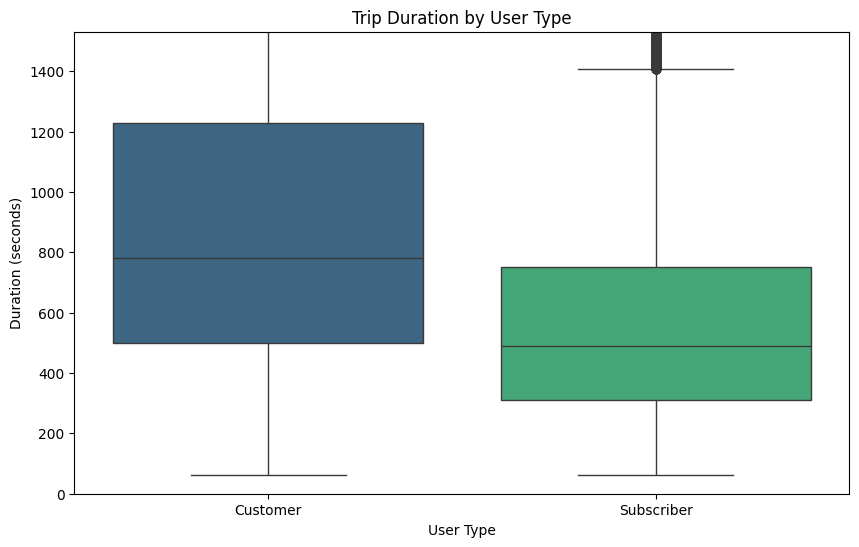

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=bikes, x='user_type', y='duration_sec', palette='viridis')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.ylim(0, bikes['duration_sec'].quantile(0.95))  
plt.show()

**Observation:** Customers tend to have longer trip durations compared to subscribers.

### Question: What is the relationship between trip duration and start hour?

To get the scatter plot:

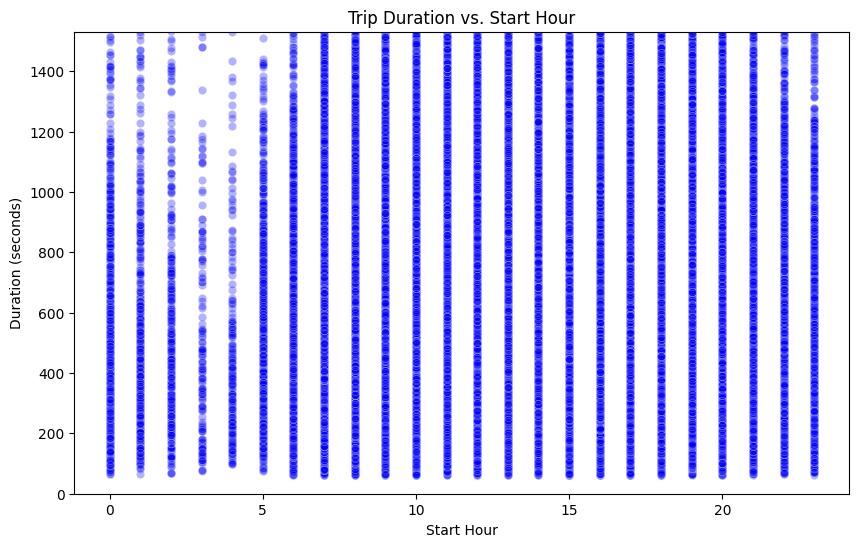

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bikes, x='start_hour', y='duration_sec', alpha=0.3, color='blue')
plt.title('Trip Duration vs. Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Duration (seconds)')
plt.ylim(0, bikes['duration_sec'].quantile(0.95))  
plt.show()

**Observation:** There is no strong relationship between trip duration and start hour.

### Question: How are trip counts distributed across start stations?

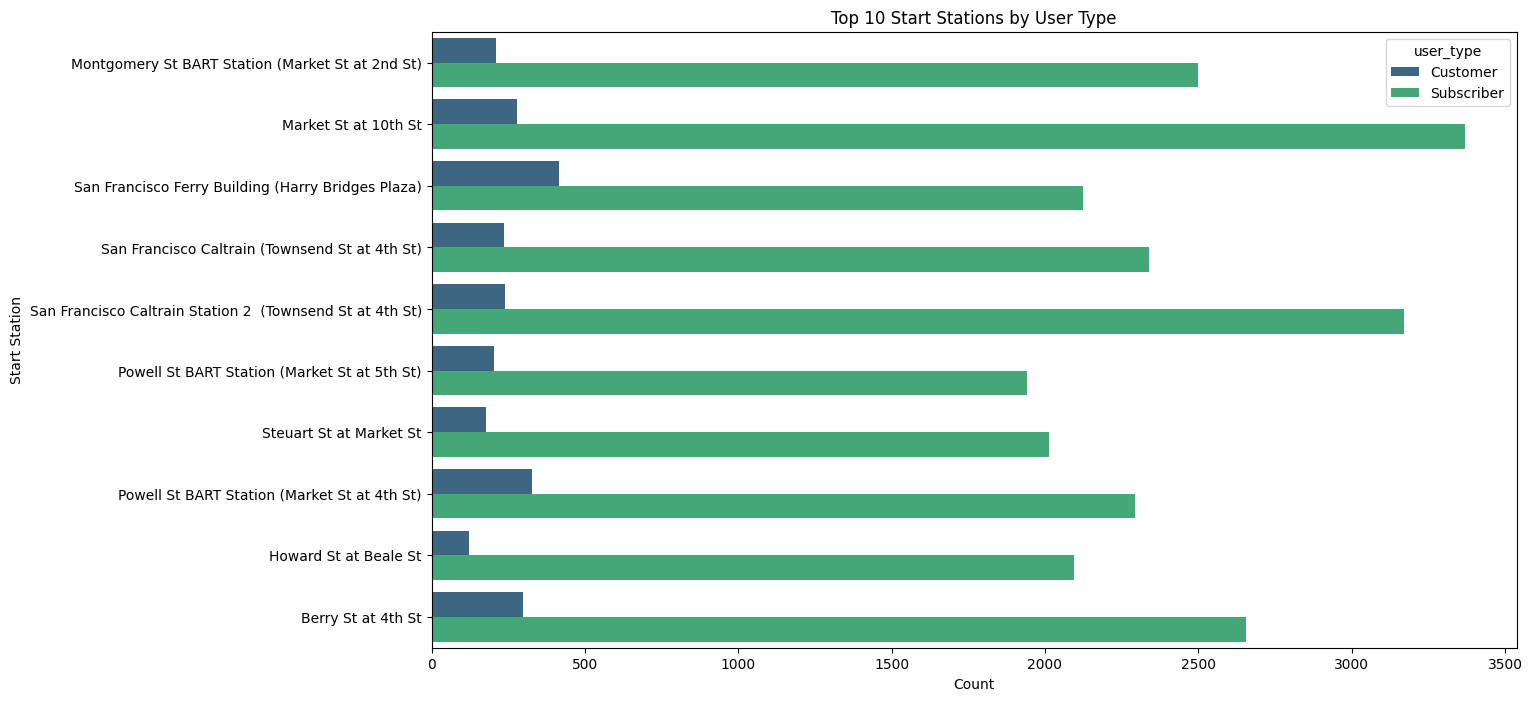

In [29]:
plt.figure(figsize=(14, 8))
top_stations = bikes['start_station_name'].value_counts().head(10).index
sns.countplot(data=bikes[bikes['start_station_name'].isin(top_stations)], y='start_station_name', hue='user_type', palette='viridis')
plt.title('Top 10 Start Stations by User Type')
plt.xlabel('Count')
plt.ylabel('Start Station')
plt.show()

**Observation:** Certain stations are more popular among both user types, with some stations showing a preference by subscribers.

Yet, Market St at 10th has the most popularity for Subscribers and Harry Bridges Plaza with the most popularity for Customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In the bivariate analysis, I noticed that user type has a significant impact on trip duration. Customers tend to have longer trip durations compared to subscribers, as shown in the box plot. This could be because customers might be using the service for longer leisure trips, while subscribers use it for shorter, possibly more routine trips, like commuting.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Beyond the main feature of interest, I observed an interesting relationship between start station popularity and user type. Certain start stations are heavily favored by both user types, but some stations show a clear preference by subscribers. This could be indicative of key commuting hubs or areas with high-density housing for subscribers, while customers might prefer stations near tourist attractions or recreational areas.

## Multivariate Exploration

one Plot Matrix or Scatterplot with multiple encodings.

### Question: How does trip duration vary by hour of the day and user type?

/opt/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


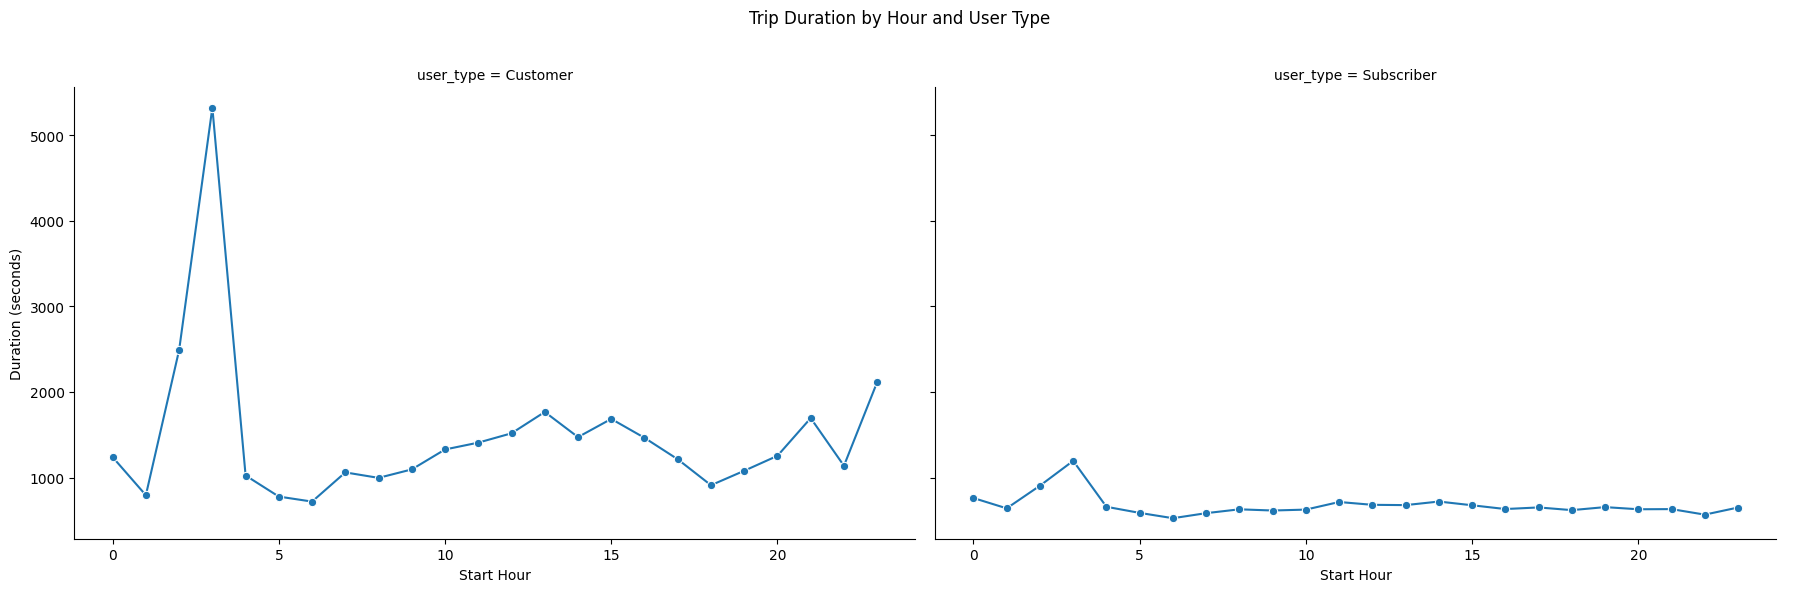

In [23]:
g = sns.FacetGrid(bikes, col="user_type", height=6, aspect=1.5)
g.map(sns.lineplot, "start_hour", "duration_sec", ci=None, marker="o")
g.set_axis_labels("Start Hour", "Duration (seconds)")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Trip Duration by Hour and User Type')
plt.show()

**Observation:** Customers generally have longer trips at any hour compared to subscribers.

### Question: What are the relationships between start hour, trip duration, and user type?

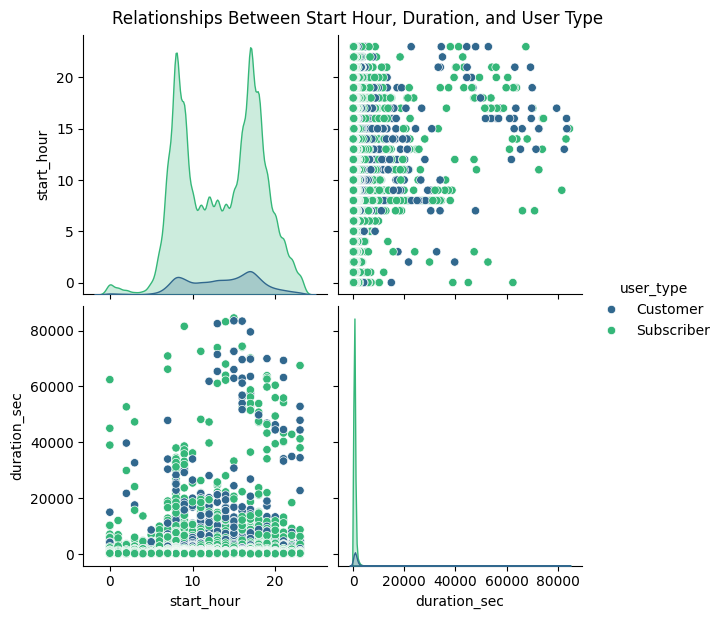

In [24]:
sns.pairplot(bikes[['start_hour', 'duration_sec', 'user_type']], hue='user_type', height=3, palette='viridis')
plt.suptitle('Relationships Between Start Hour, Duration, and User Type', y=1.02)
plt.show()

**Observation:** Customers show a wider spread in trip duration compared to subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the multivariate analysis, I observed that trip duration consistently varies by the hour of the day and user type. Customers generally have longer trips compared to subscribers, regardless of the time of day. This indicates that customer trips might be more leisurely or for recreational purposes, while subscribers, who are likely to be regular commuters, tend to have shorter trips.

### Were there any interesting or surprising interactions between features?

The relationship between start hour, trip duration, and user type offers valuable insights. User type consistently emerges as a strong predictor of trip duration, regardless of the time of day. This pattern underscores the distinct behaviors between customers and subscribers: customers generally take longer trips, which could be more leisurely, while subscribers likely use the service for shorter, more routine trips, such as commuting.

An intriguing observation is the variability in trip durations across different hours. Customers exhibit a wider range of trip durations, suggesting more diverse usage patterns, potentially driven by varying motivations like recreation or tourism. In contrast, subscribers' trip durations are more consistent and shorter, reflecting predictable and possibly routine commuting behavior. These interactions not only deepen the understanding of user habits but also offer potential insights for tailoring marketing strategies or optimizing operations.

## Conclusions

**Summary of Findings:**

**•** The majority of trips are short, typically lasting a few minutes. Subscribers are the majority user type, with generally shorter trips compared to customers.

**•** Trip durations do not vary significantly by hour of the day but are longer for customers across all hours.

**•** Certain start stations are more popular among all users, with some stations showing a preference by subscribers.

**Reflection:**

**•** The systematic exploration of the dataset revealed key insights into user behavior based on trip duration, start hour, and user type. Future analyses could explore how external factors, such as weather or special events, influence these patterns.

In [30]:
bikes.to_csv('cleaned_bikes.csv', index=False)